## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation='relu')(input_layer)
    x = keras.layers.Dense(units=256, activation='relu')(x)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(input=[input_layer], output=[out])
    return model
model = build_mlp()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  import sys


In [5]:
"""
Compile 模型
"""
model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.3263 - accuracy: 0.5264 - val_loss: 1.4155 - val_accuracy: 0.5020
Epoch 2/100
50000/50000 [==============================] - 3s 67us/step - loss: 1.3021 - accuracy: 0.5378 - val_loss: 1.4011 - val_accuracy: 0.5021
Epoch 3/100
50000/50000 [==============================] - 3s 66us/step - loss: 1.2849 - accuracy: 0.5429 - val_loss: 1.4194 - val_accuracy: 0.4966
Epoch 4/100
50000/50000 [==============================] - 3s 69us/step - loss: 1.2581 - accuracy: 0.5511 - val_loss: 1.4011 - val_accuracy: 0.5027
Epoch 5/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.2398 - accuracy: 0.5593 - val_loss: 1.3994 - val_accuracy: 0.5039
Epoch 6/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.2108 - accuracy: 0.5689 - val_loss: 1.3716 - val_accuracy: 0.5223
Epoch 7/100
50000/50000 [==============================] - 4s 

Epoch 56/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.4783 - accuracy: 0.8300 - val_loss: 2.2669 - val_accuracy: 0.5039
Epoch 57/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.4694 - accuracy: 0.8335 - val_loss: 2.3075 - val_accuracy: 0.5066
Epoch 58/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.4664 - accuracy: 0.8313 - val_loss: 2.4001 - val_accuracy: 0.4948
Epoch 59/100
50000/50000 [==============================] - 3s 66us/step - loss: 0.4486 - accuracy: 0.8401 - val_loss: 2.3470 - val_accuracy: 0.5103
Epoch 60/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.4412 - accuracy: 0.8428 - val_loss: 2.4692 - val_accuracy: 0.4983
Epoch 61/100
50000/50000 [==============================] - 3s 70us/step - loss: 0.4440 - accuracy: 0.8400 - val_loss: 2.3958 - val_accuracy: 0.5066
Epoch 62/100
50000/50000 [==============================] - 3s 69us/step - loss: 0.4433 - accuracy: 0.8404

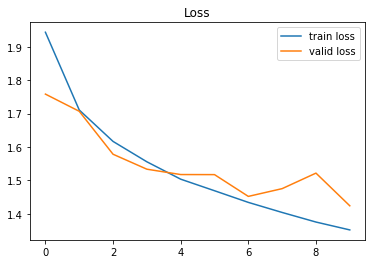

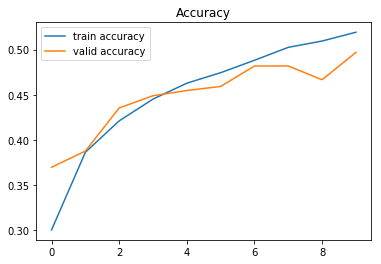

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()